In [4]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

In [5]:
train_data = pd.read_excel(r"D:\Python Resources\DATA\New folder\Flight_Price_resources\Data_Train.xlsx")

In [6]:
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


# Missing Values 

In [7]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [8]:
train_data.isnull()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
10678,False,False,False,False,False,False,False,False,False,False,False
10679,False,False,False,False,False,False,False,False,False,False,False
10680,False,False,False,False,False,False,False,False,False,False,False
10681,False,False,False,False,False,False,False,False,False,False,False


In [9]:
train_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [10]:
train_data['Total_Stops'].isnull()

0        False
1        False
2        False
3        False
4        False
         ...  
10678    False
10679    False
10680    False
10681    False
10682    False
Name: Total_Stops, Length: 10683, dtype: bool

In [11]:
train_data[train_data['Total_Stops'].isnull()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
9039,Air India,6/05/2019,Delhi,Cochin,NaN,09:45,09:25 07 May,23h 40m,NaN,No info,7480


In [12]:
train_data.dropna(inplace=True)

In [13]:
train_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [14]:
train_data.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

In [15]:
#In context of python we have dtypes as string, similarily pandas has object ~ string

In [16]:
train_data.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10682 non-null  object
 1   Date_of_Journey  10682 non-null  object
 2   Source           10682 non-null  object
 3   Destination      10682 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10682 non-null  object
 6   Arrival_Time     10682 non-null  object
 7   Duration         10682 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10682 non-null  object
 10  Price            10682 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 7.2 MB


# Preprocessing 

In [17]:
data = train_data.copy()

In [18]:
data.columns 

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [19]:
data.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882


In [20]:
def change_into_Datetime(col):
    data[col] = pd.to_datetime(data[col])

In [21]:
import warnings 
from warnings import filterwarnings 
filterwarnings("ignore")

In [22]:
for feature in ['Dep_Time','Arrival_Time','Date_of_Journey']:
    change_into_Datetime(feature)

In [23]:
data.dtypes 

Airline                    object
Date_of_Journey    datetime64[ns]
Source                     object
Destination                object
Route                      object
Dep_Time           datetime64[ns]
Arrival_Time       datetime64[ns]
Duration                   object
Total_Stops                object
Additional_Info            object
Price                       int64
dtype: object

In [24]:
data.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2023-11-03 22:20:00,2023-03-22 01:10:00,2h 50m,non-stop,No info,3897
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,2023-11-03 05:50:00,2023-11-03 13:15:00,7h 25m,2 stops,No info,7662
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,2023-11-03 09:25:00,2023-06-10 04:25:00,19h,2 stops,No info,13882


In [25]:
data['Journey_Day']= data['Date_of_Journey'].dt.day

In [26]:
data['Journey_Month'] = data['Date_of_Journey'].dt.month

In [27]:
data['Journey_Year'] = data['Date_of_Journey'].dt.year

In [28]:
data.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Journey_Year
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2023-11-03 22:20:00,2023-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,2019
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,2023-11-03 05:50:00,2023-11-03 13:15:00,7h 25m,2 stops,No info,7662,5,1,2019
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,2023-11-03 09:25:00,2023-06-10 04:25:00,19h,2 stops,No info,13882,6,9,2019


# Clean Dep_Time & Arrival_Time & Extract Derived Attributes 

In [29]:
def extract_hour_min(df,col):
    df[col + "_hour"] = df[col].dt.hour
    df[col + "_minute"] = df[col].dt.minute
    return df.head(3)

In [30]:
extract_hour_min(data, "Dep_Time")

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Journey_Year,Dep_Time_hour,Dep_Time_minute
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2023-11-03 22:20:00,2023-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,2019,22,20
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,2023-11-03 05:50:00,2023-11-03 13:15:00,7h 25m,2 stops,No info,7662,5,1,2019,5,50
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,2023-11-03 09:25:00,2023-06-10 04:25:00,19h,2 stops,No info,13882,6,9,2019,9,25


In [31]:
extract_hour_min(data,"Arrival_Time")

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Journey_Year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2023-11-03 22:20:00,2023-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,2023-11-03 05:50:00,2023-11-03 13:15:00,7h 25m,2 stops,No info,7662,5,1,2019,5,50,13,15
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,2023-11-03 09:25:00,2023-06-10 04:25:00,19h,2 stops,No info,13882,6,9,2019,9,25,4,25


In [32]:
cols_to_drop = ['Dep_Time','Arrival_Time']
data.drop(cols_to_drop,axis = 1,inplace = True)


In [33]:
data.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Journey_Year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,2019,5,50,13,15
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,6,9,2019,9,25,4,25


In [34]:
data.shape

(10682, 16)

# Analyse Flights Take-offs 

In [35]:
def flight_dep_time(x):
    if (x>4) and (x<8):
        return "Early Morning"
    elif (x>8) and (x<=12):
        return "Morning"
    elif (x>12) and (x<=16):
        return "Noon"
    elif (x>16) and (x<=20):
        return "Evening"
    elif (x>20) and (x<=24):
        return "Night"
    else:
        return "Late Night"

In [36]:
data['Dep_Time_hour'].apply(flight_dep_time).value_counts()

Evening          2357
Morning          2209
Early Morning    2183
Noon             1731
Late Night       1162
Night            1040
Name: Dep_Time_hour, dtype: int64

<Axes: >

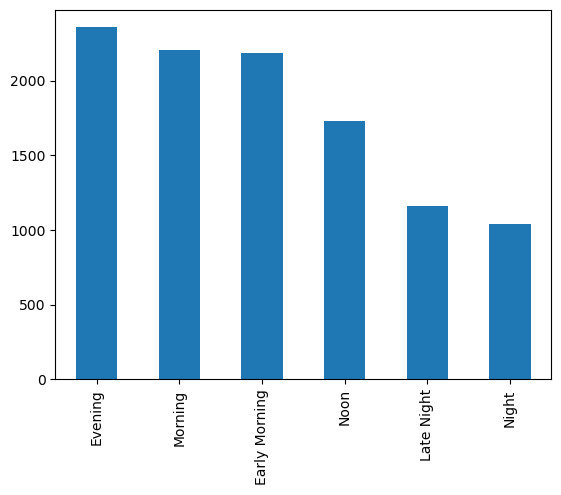

In [37]:
data['Dep_Time_hour'].apply(flight_dep_time).value_counts().plot(kind = "bar")

In [38]:
!pip install plotly
!pip install chart_studio 

     ---------------------------------------- 0.0/64.4 kB ? eta -:--:--
     ------------------ ------------------- 30.7/64.4 kB 660.6 kB/s eta 0:00:01
     ------------------------------------ - 61.4/64.4 kB 656.4 kB/s eta 0:00:01
     -------------------------------------- 64.4/64.4 kB 582.5 kB/s eta 0:00:00


In [39]:
!pip install cufflinks

     ---------------------------------------- 0.0/81.7 kB ? eta -:--:--
     ------------------- ------------------ 41.0/81.7 kB 960.0 kB/s eta 0:00:01
     -------------------------------------- 81.7/81.7 kB 760.6 kB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for cufflinks: filename=cufflinks-0.17.3-py3-none-any.whl size=68725 sha256=1b8685902c7c175aa6392e552828fe1838122ad7cecda9f05e49189c0a21c71f
  Stored in directory: c:\users\hp\appdata\local\pip\cache\wheels\c3\bf\8f\afa0730b29e347e8c1071049f89748c1262e7a14a838820ae6
Successfully built cufflinks


In [40]:
import plotly
import cufflinks as cf 
from cufflinks.offline import go_offline 
from plotly.offline import plot, iplot, init_notebook_mode
init_notebook_mode(connected=True)
cf.go_offline()

In [41]:
data['Dep_Time_hour'].apply(flight_dep_time).value_counts().iplot(kind = "bar")

In [42]:
type(data['Duration'])

pandas.core.series.Series

# PREPROCESSING DURATION VARIABLE

#In many rows either hour or either minute is missing 

In [43]:
def preprocess_duration(x):
    if 'h' not in x:
        x = '0h' + ' ' + x 
    elif 'm' not in x:
        x = x + ' ' + '0m'
        
    return x 

In [44]:
data['Duration'] = data['Duration'].apply(preprocess_duration)

In [45]:
data['Duration']

0        2h 50m
1        7h 25m
2        19h 0m
3        5h 25m
4        4h 45m
          ...  
10678    2h 30m
10679    2h 35m
10680     3h 0m
10681    2h 40m
10682    8h 20m
Name: Duration, Length: 10682, dtype: object

In [46]:
data['Duration'][0]

'2h 50m'

In [47]:
'2h 50m'.split(' ')

['2h', '50m']

In [48]:
'2h 50m'.split(' ')[0]

'2h'

In [49]:
'2h 50m'.split(' ')[0][0:-1]

'2'

In [50]:
type('2h 50m'.split(' ')[0][0:-1])

str

#convert it into integer 

In [51]:
int('2h 50m'.split(' ')[0][0:-1])

2

#Inorder to get minute value

In [52]:
int('2h 50m'.split(' ')[1][0:-1])

50

In [53]:
data['Duration_hours'] = data['Duration'].apply(lambda x: int('2h 50m'.split(' ')[0][0:-1]))

In [54]:
data['Duration_mins'] = data['Duration'].apply(lambda x: int('2h 50m'.split(' ')[1][0:-1]))

In [55]:
data.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Journey_Year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10,2,50
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,2019,5,50,13,15,2,50


In [56]:
data['Duration'].str.replace('h',"*60").str.replace(' ','+').str.replace('m',"*1")

0        2*60+50*1
1        7*60+25*1
2        19*60+0*1
3        5*60+25*1
4        4*60+45*1
           ...    
10678    2*60+30*1
10679    2*60+35*1
10680     3*60+0*1
10681    2*60+40*1
10682    8*60+20*1
Name: Duration, Length: 10682, dtype: object

In [57]:
data['Duration'].str.replace('h',"*60").str.replace(' ','+').str.replace('m',"*1").apply(eval)

0         170
1         445
2        1140
3         325
4         285
         ... 
10678     150
10679     155
10680     180
10681     160
10682     500
Name: Duration, Length: 10682, dtype: int64

In [58]:
data['Duration_total_mins'] = data['Duration'].str.replace('h',"*60").str.replace(' ','+').str.replace('m',"*1").apply(eval)

# Duration Vs Price Analysis 

<Axes: xlabel='Duration_total_mins', ylabel='Price'>

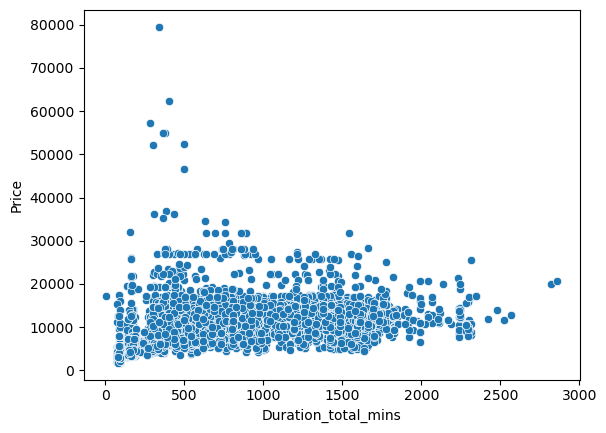

In [59]:
sns.scatterplot(x="Duration_total_mins",y = "Price", data = data)

<Axes: xlabel='Duration_total_mins', ylabel='Price'>

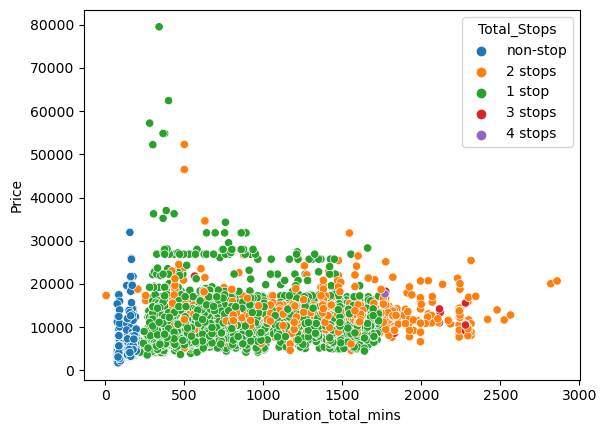

In [60]:
sns.scatterplot(x="Duration_total_mins",y = "Price", hue="Total_Stops" ,data = data)

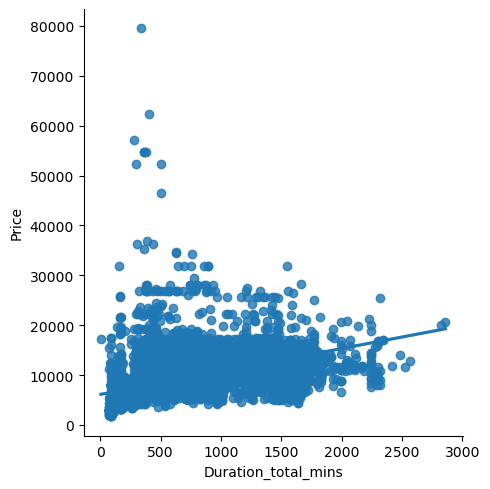

In [61]:
sns.lmplot(x = "Duration_total_mins",y = "Price", data=data)

# On Which Route Jet Airways is used the Most

In [62]:
data['Airline'].nunique()

12

In [63]:
data['Airline'].unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

In [64]:
data['Airline'] == 'Jet Airways'

0        False
1        False
2         True
3        False
4        False
         ...  
10678    False
10679    False
10680     True
10681    False
10682    False
Name: Airline, Length: 10682, dtype: bool

In [65]:
data[data['Airline'] == 'Jet Airways'].groupby('Route').count()

,Airline,Date_of_Journey,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Journey_Year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins,Duration_total_mins
Route,,,,,,,,,,,,,,,,,,
BLR → BDQ → DEL,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8
BLR → BOM → DEL,385,385,385,385,385,385,385,385,385,385,385,385,385,385,385,385,385,385
BLR → BOM → JDH → DEL,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
BLR → DEL,382,382,382,382,382,382,382,382,382,382,382,382,382,382,382,382,382,382
BLR → MAA → DEL,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10
BOM → BDQ → DEL → HYD,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
BOM → DED → DEL → HYD,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
BOM → DEL → HYD,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5
BOM → HYD,207,207,207,207,207,207,207,207,207,207,207,207,207,207,207,207,207,207


In [66]:
data[data['Airline'] == 'Jet Airways'].groupby('Route').size().sort_values(ascending = False)

Route
CCU → BOM → BLR          930
DEL → BOM → COK          875
BLR → BOM → DEL          385
BLR → DEL                382
CCU → DEL → BLR          300
BOM → HYD                207
DEL → JAI → BOM → COK    207
DEL → AMD → BOM → COK    141
DEL → IDR → BOM → COK     86
DEL → NAG → BOM → COK     61
DEL → ATQ → BOM → COK     38
DEL → COK                 34
DEL → BHO → BOM → COK     29
DEL → BDQ → BOM → COK     28
DEL → LKO → BOM → COK     25
DEL → JDH → BOM → COK     23
CCU → GAU → BLR           22
DEL → MAA → BOM → COK     16
DEL → IXC → BOM → COK     13
BLR → MAA → DEL           10
BLR → BDQ → DEL            8
DEL → UDR → BOM → COK      7
BOM → DEL → HYD            5
CCU → BOM → PNQ → BLR      4
BLR → BOM → JDH → DEL      3
DEL → DED → BOM → COK      2
BOM → BDQ → DEL → HYD      2
DEL → CCU → BOM → COK      1
BOM → VNS → DEL → HYD      1
BOM → UDR → DEL → HYD      1
BOM → JDH → DEL → HYD      1
BOM → IDR → DEL → HYD      1
BOM → DED → DEL → HYD      1
dtype: int64

# Airline VS Price Analysis 

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'Jet Airways Business'),
  Text(1, 0, 'Jet Airways'),
  Text(2, 0, 'Multiple carriers'),
  Text(3, 0, 'Air India'),
  Text(4, 0, 'SpiceJet'),
  Text(5, 0, 'GoAir'),
  Text(6, 0, 'IndiGo'),
  Text(7, 0, 'Vistara'),
  Text(8, 0, 'Multiple carriers Premium economy'),
  Text(9, 0, 'Air Asia'),
  Text(10, 0, 'Vistara Premium economy'),
  Text(11, 0, 'Trujet')])

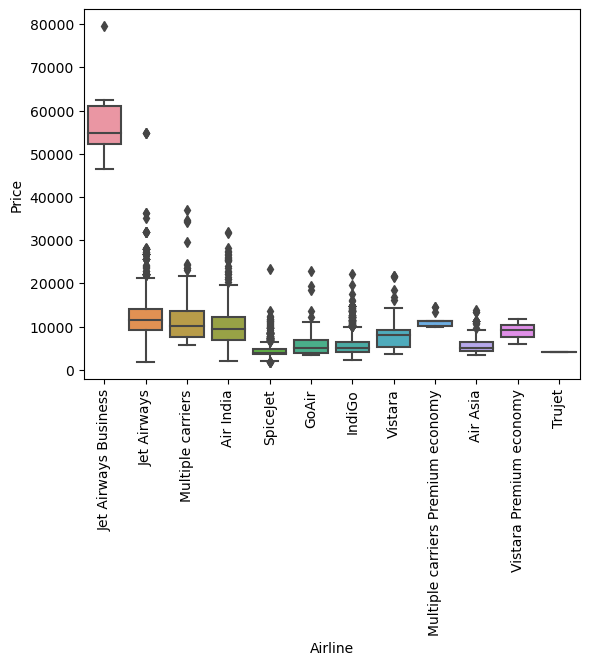

In [67]:
sns.boxplot(y= 'Price', x = 'Airline', data = data.sort_values('Price', ascending= False))
plt.xticks(rotation = "vertical")

In [68]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Journey_Year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins,Duration_total_mins
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10,2,50,170
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,2019,5,50,13,15,2,50,445
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,6,9,2019,9,25,4,25,2,50,1140
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,5,12,2019,18,5,23,30,2,50,325
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,3,1,2019,16,50,21,35,2,50,285


# One Hot Feature Engineering 

In [69]:
cat_col = [col for col in data.columns if data[col].dtype =="object"]

In [70]:
num_col = [col for col in data.columns if data[col].dtype != "object"]

In [71]:
data['Source'].unique()

array(['Banglore', 'Kolkata', 'Delhi', 'Chennai', 'Mumbai'], dtype=object)

In [72]:
data['Source'].apply(lambda x: 1 if x== 'Bangalor' else 0 )

0        0
1        0
2        0
3        0
4        0
        ..
10678    0
10679    0
10680    0
10681    0
10682    0
Name: Source, Length: 10682, dtype: int64

In [73]:
for sub_category in data['Source'].unique():
     data['Source' + sub_category] = data['Source'].apply(lambda x: 1 if x == sub_category else 0)

In [74]:
data.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_Day,...,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins,Duration_total_mins,SourceBanglore,SourceKolkata,SourceDelhi,SourceChennai,SourceMumbai
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,...,1,10,2,50,170,1,0,0,0,0
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,...,13,15,2,50,445,0,1,0,0,0
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,6,...,4,25,2,50,1140,0,0,1,0,0


In [75]:
data['Airline'].unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

In [76]:
data['Airline'].nunique()

12

# Target Guided Encoding 

In [77]:
data.groupby(data['Airline'])['Price'].mean().sort_values()

Airline
Trujet                                4140.000000
SpiceJet                              4338.284841
Air Asia                              5590.260188
IndiGo                                5673.682903
GoAir                                 5861.056701
Vistara                               7796.348643
Vistara Premium economy               8962.333333
Air India                             9612.427756
Multiple carriers                    10902.678094
Multiple carriers Premium economy    11418.846154
Jet Airways                          11643.923357
Jet Airways Business                 58358.666667
Name: Price, dtype: float64

In [78]:
airlines = data.groupby(data['Airline'])['Price'].mean().sort_values().index

In [79]:
dict_airlines = {key: index for index, key in enumerate(airlines,0)}
dict_airlines 

{'Trujet': 0,
 'SpiceJet': 1,
 'Air Asia': 2,
 'IndiGo': 3,
 'GoAir': 4,
 'Vistara': 5,
 'Vistara Premium economy': 6,
 'Air India': 7,
 'Multiple carriers': 8,
 'Multiple carriers Premium economy': 9,
 'Jet Airways': 10,
 'Jet Airways Business': 11}

In [80]:
data['Airline'] = data['Airline'].map(dict_airlines)
data['Airline']

0         3
1         7
2        10
3         3
4         3
         ..
10678     2
10679     7
10680    10
10681     5
10682     7
Name: Airline, Length: 10682, dtype: int64

In [81]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_Day,...,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins,Duration_total_mins,SourceBanglore,SourceKolkata,SourceDelhi,SourceChennai,SourceMumbai
0,3,2019-03-24,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,...,1,10,2,50,170,1,0,0,0,0
1,7,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,...,13,15,2,50,445,0,1,0,0,0
2,10,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,6,...,4,25,2,50,1140,0,0,1,0,0
3,3,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,5,...,23,30,2,50,325,0,1,0,0,0
4,3,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,3,...,21,35,2,50,285,1,0,0,0,0


In [82]:
data['Destination'].unique()

array(['New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Delhi', 'Hyderabad'],
      dtype=object)

In [83]:
data['Destination'].replace('New Delhi', 'Delhi', inplace=True)

In [84]:
data['Destination'].unique()

array(['Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Hyderabad'],
      dtype=object)

In [85]:
dest = data.groupby(data['Destination'])['Price'].mean().sort_values().index
dest

Index(['Kolkata', 'Hyderabad', 'Delhi', 'Banglore', 'Cochin'], dtype='object', name='Destination')

In [86]:
dict_airlines = {key: index for index, key in enumerate(dest,0)}
dict_airlines 

{'Kolkata': 0, 'Hyderabad': 1, 'Delhi': 2, 'Banglore': 3, 'Cochin': 4}

In [87]:
data['Destination'] = data['Destination'].map(dict_airlines)

In [88]:
data.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_Day,...,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins,Duration_total_mins,SourceBanglore,SourceKolkata,SourceDelhi,SourceChennai,SourceMumbai
0,3,2019-03-24,Banglore,2,BLR → DEL,2h 50m,non-stop,No info,3897,24,...,1,10,2,50,170,1,0,0,0,0
1,7,2019-01-05,Kolkata,3,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,...,13,15,2,50,445,0,1,0,0,0
2,10,2019-09-06,Delhi,4,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,6,...,4,25,2,50,1140,0,0,1,0,0


# Manual Encoding 

In [89]:
data['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

#This is Ordinal Data

In [90]:
stop = {'non-stop':0, '2 stops':2, '1 stop':1, '3 stops':3, '4 stops':4}

In [91]:
data['Total_Stops'] = data['Total_Stops'].map(stop)

In [92]:
data.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_Day,...,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins,Duration_total_mins,SourceBanglore,SourceKolkata,SourceDelhi,SourceChennai,SourceMumbai
0,3,2019-03-24,Banglore,2,BLR → DEL,2h 50m,0,No info,3897,24,...,1,10,2,50,170,1,0,0,0,0
1,7,2019-01-05,Kolkata,3,CCU → IXR → BBI → BLR,7h 25m,2,No info,7662,5,...,13,15,2,50,445,0,1,0,0,0
2,10,2019-09-06,Delhi,4,DEL → LKO → BOM → COK,19h 0m,2,No info,13882,6,...,4,25,2,50,1140,0,0,1,0,0


# Remove Unnecessary Feature

In [93]:
data['Additional_Info'].value_counts()

No info                         8344
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
1 Short layover                    1
Red-eye flight                     1
2 Long layover                     1
Name: Additional_Info, dtype: int64

#Similarly total stops is associated with route feature 

In [94]:
data.drop(columns=['Date_of_Journey','Additional_Info','Duration_total_mins','Source','Journey_Year'],axis=1,inplace=True)

In [95]:
data['Journey_Year'].unique()

KeyError: 'Journey_Year'

In [ ]:
data.head()

In [112]:
data.drop(columns = ['Route'], axis= 1, inplace = True)

In [113]:
data.drop(columns = ['Duration'], axis = 1, inplace = True)

In [114]:
data.head(3)

,Airline,Destination,Total_Stops,Price,Journey_Day,Journey_Month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins,SourceBanglore,SourceKolkata,SourceDelhi,SourceChennai,SourceMumbai
0,3,2,0,3897,24,3,22,20,1,10,2,50,1,0,0,0,0
1,7,3,2,7662,5,1,5,50,13,15,2,50,0,1,0,0,0
2,10,4,2,13882,6,9,9,25,4,25,2,50,0,0,1,0,0


In [ ]:
#Outlier Detection 

In [115]:
def plot(df, col):
    fig, (ax1, ax2, ax3) = plt.subplots(3,1)
    
    sns.distplot(df[col], ax = ax1)
    sns.boxplot(df[col], ax = ax2)
    sns.distplot(df[col], ax = ax3, kde = False)

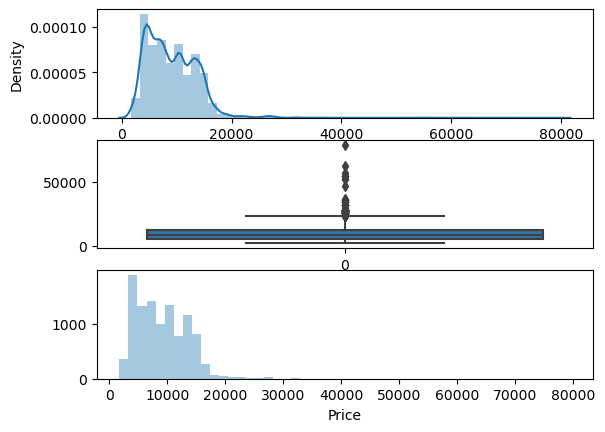

In [116]:
plot(data, 'Price')

##Replace these outliers with the median of the price 

In [117]:
q1 = data['Price'].quantile(0.25)
q3 = data['Price'].quantile(0.75)

iqr = q3 - q1
maximum = q3 + 1.5*iqr
minimum = q1 - 1.5*iqr

print(maximum)



23017.0


In [118]:
print(minimum)

-5367.0


In [119]:
print([price for price in data['Price'] if price>maximum or price<minimum])

[27430, 36983, 26890, 26890, 25139, 27210, 52229, 26743, 26890, 25735, 27992, 26890, 26890, 23583, 26890, 23533, 24115, 25735, 54826, 31783, 27992, 26890, 26890, 25430, 36235, 27210, 26890, 25735, 54826, 26890, 35185, 79512, 28097, 27992, 26890, 25735, 26092, 31825, 25913, 25735, 27992, 31825, 23267, 62427, 54826, 31825, 25430, 26890, 36235, 23843, 26890, 25735, 28322, 25735, 25735, 31825, 26890, 27992, 34273, 46490, 29528, 26890, 26890, 26890, 34503, 26890, 27992, 26890, 26890, 23170, 24528, 26890, 27992, 25735, 34608, 25703, 26890, 23528, 31825, 27282, 25735, 27992, 52285, 24017, 31945, 26890, 24318, 23677, 27992, 24210, 57209, 26890, 31825, 26480]


In [120]:
len([price for price in data['Price'] if price>maximum or price<minimum])

94

In [121]:
data['Price'].median()

8372.0

#suppose domain expert suggested 35,000 as threshold value 

In [122]:
data['Price'] = np.where(data['Price']>35000, data['Price'].median(),data['Price'])

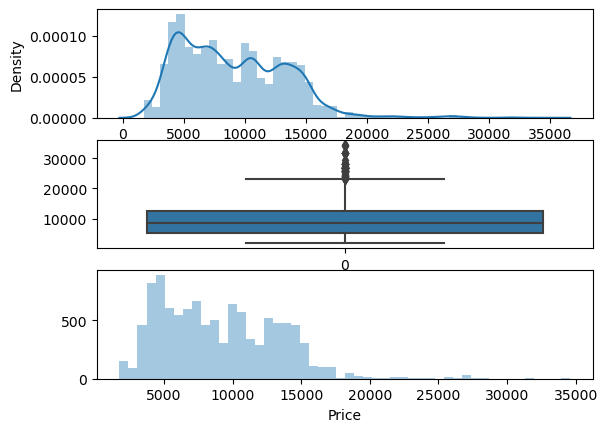

In [123]:
plot(data, 'Price')

# Feature Selection 

In [124]:
x = data.drop(['Price'],axis=1)
y = data['Price']

In [125]:
from sklearn.feature_selection import mutual_info_regression 
imp = mutual_info_regression(x,y)
imp_df = pd.DataFrame(imp, index = x.columns)
imp_df.columns = ['Importance']
imp_df
imp_df.sort_values(by='Importance',ascending = False)

,Importance
Destination,1.003752
Airline,0.970029
Total_Stops,0.782147
SourceDelhi,0.520706
SourceKolkata,0.464944
Arrival_Time_hour,0.398317
SourceBanglore,0.384508
Arrival_Time_minute,0.346680
Dep_Time_hour,0.333830
Dep_Time_minute,0.264444


# Build Machine Learning Model 

In [126]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

In [128]:
x_train.head(2)

,Airline,Destination,Total_Stops,Journey_Day,Journey_Month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins,SourceBanglore,SourceKolkata,SourceDelhi,SourceChennai,SourceMumbai
752,3,4,1,27,5,16,0,21,0,2,50,0,0,1,0,0
7430,3,3,0,3,6,15,10,17,45,2,50,0,1,0,0,0


In [129]:
from sklearn.ensemble import RandomForestRegressor
ml_model = RandomForestRegressor()
ml_model.fit(x_train,y_train)

RandomForestRegressor()

In [130]:
y_pred = ml_model.predict(x_test)
y_pred

array([16698.95,  6041.86,  9047.05, ...,  3578.28,  6301.56,  6906.04])

In [131]:
from sklearn import metrics 
metrics.r2_score(y_test,y_pred)

0.8176164302221431

In [132]:
import pickle

In [133]:
file = open(r"D:\Python Resources\rf_random.pkl",'wb')
pickle.dump(ml_model, file)

In [134]:
model =  open(r"D:\Python Resources\rf_random.pkl",'rb')
forest = pickle.load(model)
y_pred2 = forest.predict(x_test)
metrics.r2_score(y_test,y_pred2)

0.8176164302221431

# Define Evaluation Metric 

# Mean Actual Percentage Error 

In [135]:
def mape(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [136]:
mape(y_test, y_pred)

13.024879063071584

In [137]:
from sklearn import metrics

In [138]:
def predict(ml_model):
    model = ml_model.fit(x_train,y_train)
    print('Training score: {}'.format(model.score(x_train,y_train)))
    y_prediction = model.predict(x_test)
    print('predictions are : {}'.format(y_prediction))
    print('\n')
    r2_score = metrics.r2_score(y_test,y_prediction)
    print('r2 score : {}'.format(r2_score))
    print('MAE : {}'.format(metrics.mean_absolute_error(y_test, y_prediction)))
    print('MSE : {}'.format(metrics.mean_squared_error(y_test, y_prediction)))
    print('RMSE : {}'.format(np.sqrt(metrics.mean_squared_error(y_test,y_prediction))))
    print('MAPE : {}'.format(mape(y_test,y_prediction)))
    sns.distplot(y_test - y_prediction)

In [140]:
x_train.head(1)

,Airline,Destination,Total_Stops,Journey_Day,Journey_Month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins,SourceBanglore,SourceKolkata,SourceDelhi,SourceChennai,SourceMumbai
752,3,4,1,27,5,16,0,21,0,2,50,0,0,1,0,0


Training score: 0.9514045359571801
predictions are : [16701.12        6131.97        8921.21       ...  3497.78
  6399.75        6804.85666667]


r2 score : 0.8188662472140178
MAE : 1155.2227854024277
MSE : 3526239.385134494
RMSE : 1877.82836945619
MAPE : 13.037376522467179


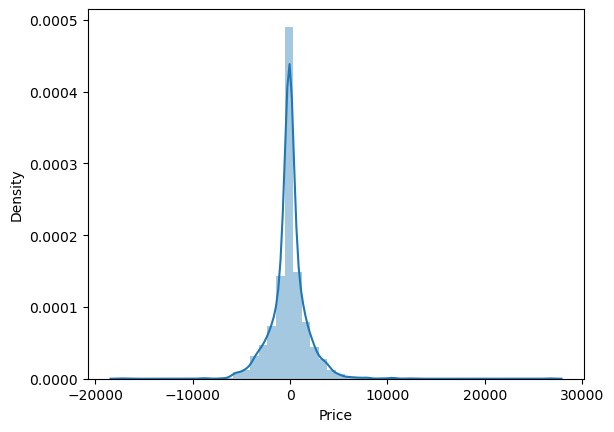

In [141]:
predict(RandomForestRegressor())

Training score: 0.9664729217335591
predictions are : [16840.  5135.  9187. ...  3419.  5797.  6842.]


r2 score : 0.7089254016500808
MAE : 1330.2050418070637
MSE : 5666523.753452099
RMSE : 2380.4461248791367
MAPE : 14.991009076936862


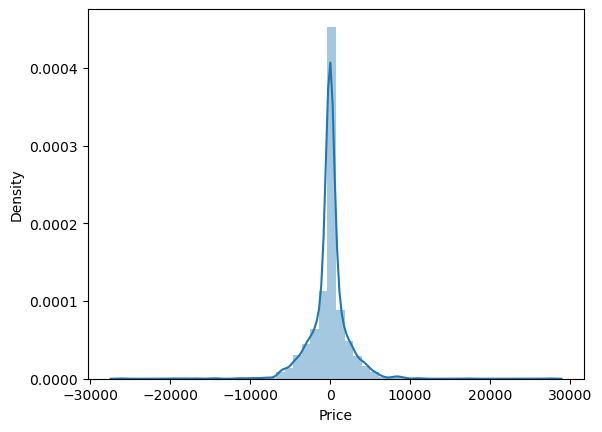

In [142]:
from sklearn.tree import DecisionTreeRegressor
predict(DecisionTreeRegressor())

# HyperTune Machine Learning Model 

In [160]:
from sklearn.model_selection import RandomizedSearchCV

In [161]:
reg_rf = RandomForestRegressor()
np.linspace(start=100, stop = 1200, num=6)


array([ 100.,  320.,  540.,  760.,  980., 1200.])

In [162]:
n_estimators = [int(x) for x in np.linspace(start=100,stop=1200,num=6)]
max_features = ["auto","sqrt"]
max_depth = [int(x) for x in np.linspace(start = 5, stop = 30, num=4)]
min_sample_split = [5,10,15,100]

In [164]:
random_grid = {
    'n_estimators': n_estimators ,
    'max_features': max_features ,
    'max_depth': max_depth,
}

In [165]:
random_grid

{'n_estimators': [100, 320, 540, 760, 980, 1200],
 'max_features': ['auto', 'sqrt'],
 'max_depth': [5, 13, 21, 30]}

In [166]:
rf_random = RandomizedSearchCV(estimator=reg_rf,param_distributions=random_grid,cv=3,n_jobs=-1,verbose=2)

In [167]:
rf_random.fit(x_train,y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'max_depth': [5, 13, 21, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'n_estimators': [100, 320, 540, 760,
                                                         980, 1200]},
                   verbose=2)

In [169]:
rf_random.best_params_

{'n_estimators': 320, 'max_features': 'sqrt', 'max_depth': 13}